In [37]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal, UVFlag, utils
import warnings

In [32]:
warnings.filterwarnings(action='ignore')

In [64]:
oldpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/'
newpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/RawData/2457548/'
calpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/CalibratedData/2457548/'
stem = 'zen.2457548.45923'
rawfile = newpath+stem+'.uvcRP.uvh5'
calfits = oldpath+stem+'.HH.uvcRP.calfits'

In [3]:
uvd = UVData()
uvc = UVCal()

In [4]:
uvd.read(rawfile)
uvc.read_calfits(calfits)

In [24]:
ants_actual = uvd.get_ants
ants_good

In [26]:
uvc.gain_array.shape

(19, 1, 1024, 56, 2)

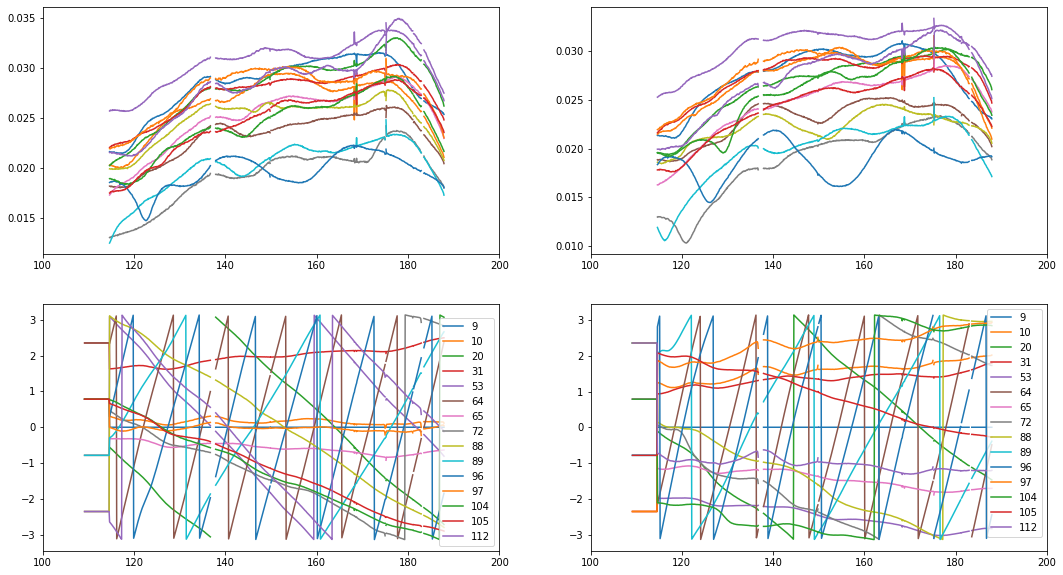

In [45]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
for i in np.arange(uvd.Nants_data):
    if uvc.flag_array[i,0,:,:,0].mean() != 1:
        plt.plot(uvc.freq_array.squeeze()/1e6,np.abs(uvc.gain_array[i,0,:,0,0]/~uvc.flag_array[i,0,:,0,0]),
                 label=ants_actual[i])
    #plt.legend()
plt.xlim([100,200])
plt.subplot(2,2,2)
for i in np.arange(uvd.Nants_data):
    if uvc.flag_array[i,0,:,:,0].mean() != 1:
        plt.plot(uvc.freq_array.squeeze()/1e6,np.abs(uvc.gain_array[i,0,:,0,1]/~uvc.flag_array[i,0,:,0,1]),
                 label=ants_actual[i])
    #plt.legend()
plt.xlim([100,200])
plt.subplot(2,2,3)
for i in np.arange(uvd.Nants_data):
    if uvc.flag_array[i,0,:,:,0].mean() != 1:
        plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[i,0,:,0,0]/~uvc.flag_array[i,0,:,0,0]),
                 label=ants_actual[i])
    plt.legend()
plt.xlim([100,200])
plt.subplot(2,2,4)
for i in np.arange(uvd.Nants_data):
    if uvc.flag_array[i,0,:,:,0].mean() != 1:
        plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[i,0,:,0,1]/~uvc.flag_array[i,0,:,0,1]),
                 label=ants_actual[i])
    plt.legend()
plt.xlim([100,200])

plt.show()
#plt.subplot(1,2,2)
#plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[1,0,:,0,0]/~uvc.flag_array[1,0,:,0,0]))
#plt.plot(uvc.freq_array.squeeze()/1e6,np.angle(uvc.gain_array[1,0,:,0,1]/~uvc.flag_array[1,0,:,0,1]))
#plt.xlim([115,185])

In [46]:
uvf_ant = UVFlag(uvc, mode='flag', copy_flags=True)
for i, ant in enumerate(uvf_ant.ant_array):
    print('{:03} {:.5f} {:.5f}'.format(ant, uvf_ant.flag_array[i,0,:,:,0].mean(), 
                                    uvf_ant.flag_array[i,0,:,:,1].mean()))

009 0.28516 0.28516
010 0.28516 0.28516
020 0.28516 0.28516
022 1.00000 1.00000
031 0.28516 0.28516
043 1.00000 1.00000
053 0.28516 0.28516
064 0.28516 0.28516
065 0.28516 0.28516
072 0.28516 0.28516
080 1.00000 1.00000
081 1.00000 1.00000
088 0.28516 0.28516
089 0.28516 0.28516
096 0.28516 0.28516
097 0.28516 0.28516
104 0.28516 0.28516
105 0.28516 0.28516
112 0.28516 0.28516


In [47]:
test_bls = [(88,64,'xx'), (97,10,'xx'), (20,31,'xx')]
test_uvd = uvd.select(bls=test_bls, inplace=False)

In [48]:
uvd_calibrated = utils.uvcalibrate(uvd, uvc, inplace=False)
test_uvd_calibrated = uvd_calibrated.select(bls=test_bls, inplace=False)

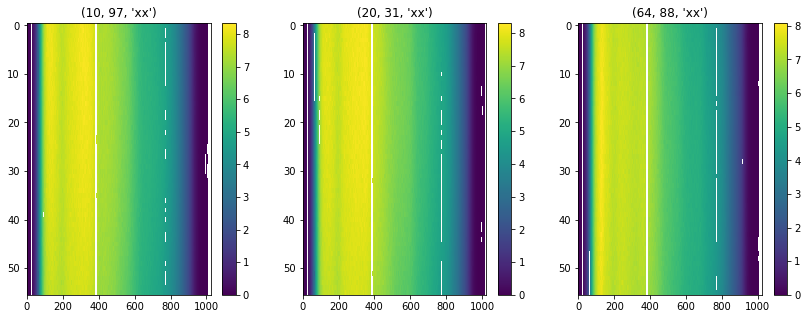

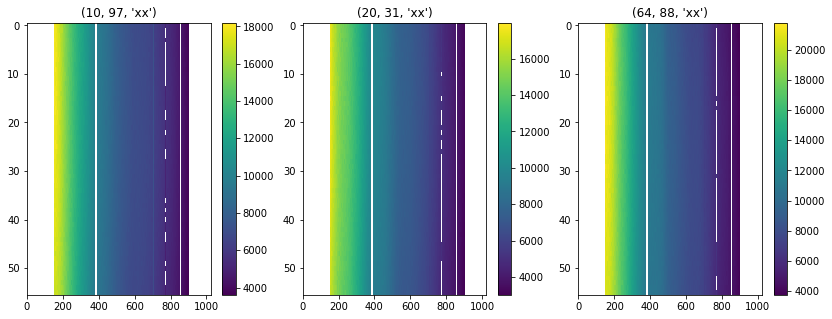

In [50]:
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.abs(test_uvd.get_data(app))/~test_uvd.get_flags(app),aspect='auto')
    plt.colorbar()
plt.show()
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.abs(test_uvd_calibrated.get_data(app))/~test_uvd_calibrated.get_flags(app),aspect='auto')
    plt.colorbar()
plt.show()

In [51]:
test_uvd.get_data(app).shape

(56, 1024)

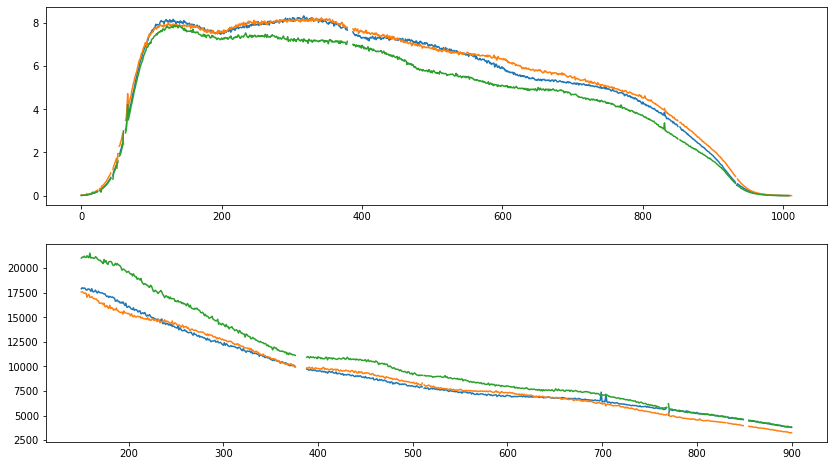

In [56]:
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.plot((np.abs(test_uvd.get_data(app))/~test_uvd.get_flags(app))[0,:])
plt.subplot(2,1,2)
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    plt.plot((np.abs(test_uvd_calibrated.get_data(app))/~test_uvd_calibrated.get_flags(app))[0,:])
plt.show()

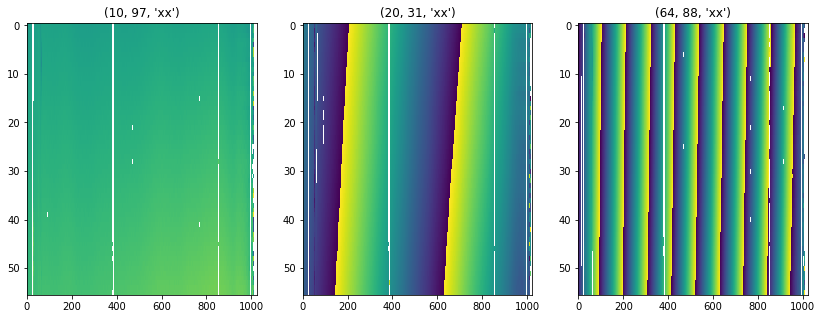

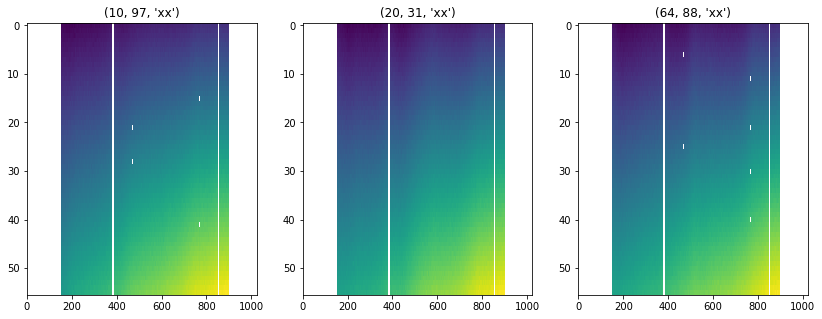

In [59]:
fix_conj = [False, True, False]
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    plt.imshow(np.angle(test_uvd.get_data(app))/~test_uvd.get_flags(app),aspect='auto')
    #plt.colorbar()
plt.show()
plt.figure(figsize=(14,5))
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    plt.subplot(1,3,i+1)
    plt.title(app)
    if fix_conj[i]:
        vis = np.conj(test_uvd_calibrated.get_data(app))
    else:
        vis = test_uvd_calibrated.get_data(app)
    plt.imshow(np.angle(vis)/~test_uvd_calibrated.get_flags(app),aspect='auto')
plt.show()


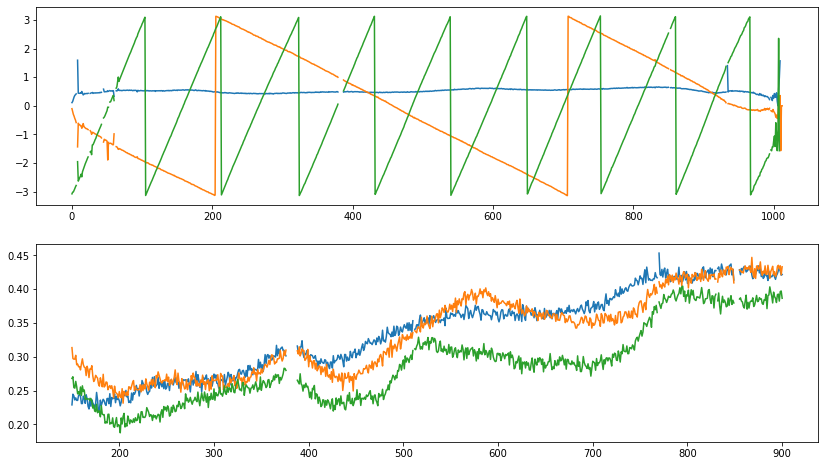

In [61]:
fix_conj = [False, True, False]
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
for i,app in enumerate(test_uvd.get_antpairpols()):
    plt.plot((np.angle(test_uvd.get_data(app))/~test_uvd.get_flags(app))[0,:])
plt.subplot(2,1,2)
for i,app in enumerate(test_uvd_calibrated.get_antpairpols()):
    if fix_conj[i]:
        vis = np.conj(test_uvd_calibrated.get_data(app))
    else:
        vis = test_uvd_calibrated.get_data(app)
    plt.plot((np.angle(vis)/~test_uvd_calibrated.get_flags(app))[0,:])
plt.show()

In [69]:
uvd_calibrated.flag_array.shape

(10640, 1, 1024, 4)

In [77]:
bl

(112, 112, 'yx')

In [80]:
utils.uvcalibrate?

In [79]:
for i, bl in enumerate(uvd_calibrated.get_antpairpols()):
    print('{} {:.5f} {:.5f}'.format(bl,
                                    uvd_calibrated.get_flags(bl).mean(),
                                    uvd_calibrated.get_flags(bl).mean()))

(9, 9, 'xx') 0.28772 0.28772
(9, 9, 'yy') 0.28573 0.28573
(9, 9, 'xy') 0.29194 0.29194
(9, 9, 'yx') 0.29194 0.29194
(9, 10, 'xx') 0.28608 0.28608
(9, 10, 'yy') 0.28601 0.28601
(9, 10, 'xy') 0.28577 0.28577
(9, 10, 'yx') 0.28591 0.28591
(9, 20, 'xx') 0.28598 0.28598
(9, 20, 'yy') 0.28624 0.28624
(9, 20, 'xy') 0.28578 0.28578
(9, 20, 'yx') 0.28599 0.28599
(9, 22, 'xx') 1.00000 1.00000
(9, 22, 'yy') 1.00000 1.00000
(9, 22, 'xy') 1.00000 1.00000
(9, 22, 'yx') 1.00000 1.00000
(9, 31, 'xx') 0.28615 0.28615
(9, 31, 'yy') 0.28606 0.28606
(9, 31, 'xy') 0.28577 0.28577
(9, 31, 'yx') 0.28594 0.28594
(9, 43, 'xx') 1.00000 1.00000
(9, 43, 'yy') 1.00000 1.00000
(9, 43, 'xy') 1.00000 1.00000
(9, 43, 'yx') 1.00000 1.00000
(9, 53, 'xx') 0.28601 0.28601
(9, 53, 'yy') 0.28592 0.28592
(9, 53, 'xy') 0.28575 0.28575
(9, 53, 'yx') 0.28559 0.28559
(9, 64, 'xx') 0.28643 0.28643
(9, 64, 'yy') 0.28594 0.28594
(9, 64, 'xy') 0.28619 0.28619
(9, 64, 'yx') 0.28598 0.28598
(9, 65, 'xx') 0.28606 0.28606
(9, 65, 'yy') 

(80, 81, 'yy') 1.00000 1.00000
(80, 81, 'xy') 1.00000 1.00000
(80, 81, 'yx') 1.00000 1.00000
(80, 88, 'xx') 1.00000 1.00000
(80, 88, 'yy') 1.00000 1.00000
(80, 88, 'xy') 1.00000 1.00000
(80, 88, 'yx') 1.00000 1.00000
(80, 89, 'xx') 1.00000 1.00000
(80, 89, 'yy') 1.00000 1.00000
(80, 89, 'xy') 1.00000 1.00000
(80, 89, 'yx') 1.00000 1.00000
(80, 96, 'xx') 1.00000 1.00000
(80, 96, 'yy') 1.00000 1.00000
(80, 96, 'xy') 1.00000 1.00000
(80, 96, 'yx') 1.00000 1.00000
(80, 97, 'xx') 1.00000 1.00000
(80, 97, 'yy') 1.00000 1.00000
(80, 97, 'xy') 1.00000 1.00000
(80, 97, 'yx') 1.00000 1.00000
(80, 104, 'xx') 1.00000 1.00000
(80, 104, 'yy') 1.00000 1.00000
(80, 104, 'xy') 1.00000 1.00000
(80, 104, 'yx') 1.00000 1.00000
(80, 105, 'xx') 1.00000 1.00000
(80, 105, 'yy') 1.00000 1.00000
(80, 105, 'xy') 1.00000 1.00000
(80, 105, 'yx') 1.00000 1.00000
(80, 112, 'xx') 1.00000 1.00000
(80, 112, 'yy') 1.00000 1.00000
(80, 112, 'xy') 1.00000 1.00000
(80, 112, 'yx') 1.00000 1.00000
(81, 81, 'xx') 1.00000 1.00

In [82]:
uvd_calibrated.write_uvh5(calpath+stem+'.uvcRP.calibrated.uvh5')

In [83]:
uvd_calibrated.write_uvfits?

In [85]:
uvd_calibrated.write_uvfits(calpath+stem+'.uvcRP.calibrated.uvfits', spoof_nonessential=True, force_phase=True)